# Convolution and CNN demo

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2017 Winter Term 2

Mike Gelbart

In [1]:
import numpy as np
from scipy.signal import convolve2d
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def preprocess_image(filename):
    img = imread(filename) # read in the image
    img = resize(img, (100,100), mode='reflect') # resize it if you want
    # above: the mode='constant' is just to avoid a warning, I don't expect the original
    # image to be smaller than 100x100
    return rgb2gray(img) # make it grayscale

def show_conv(img, filt):

    plt.figure(figsize=(8,16))
    plt.subplot(1,2,1)
    
    plt.imshow(img, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("original")
    I_filt = convolve2d(img,filt, boundary='symm', mode='same')

    plt.subplot(1,2,2)
    if np.sum(filt) == 0: # a trick to make the images easier to see, not part of the "math"
        I_filt = np.abs(I_filt)/np.max(np.abs(I_filt))

    I_filt = np.maximum(0, I_filt) # set negative values to 0, for visualization purposes
    I_filt = np.minimum(1, I_filt) # set values greater than 1 to 1, for visualization purposes

    plt.imshow(I_filt, cmap='gray')

    plt.xticks(())
    plt.yticks(())
    plt.title("filtered")

    return I_filt

## Some examples of convolutions with an image of bricks

#### original image

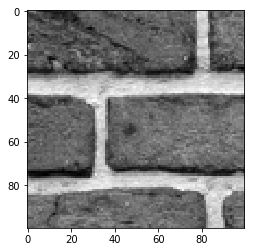

In [3]:
img = preprocess_image(os.path.join("img", "bricks_smaller.jpg"))
plt.imshow(img, cmap='gray');

#### horizontal blurring

(1, 10)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


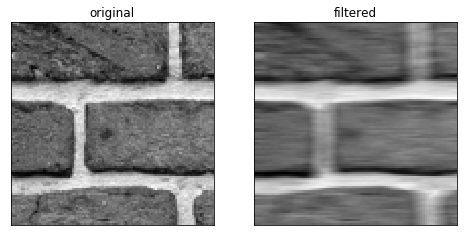

In [4]:
ft1 = 0.1*np.ones(10)[None]
print(ft1.shape)
print(ft1)

res2 = show_conv(img, ft1)

#### vertical blurring

(10, 1)
[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]


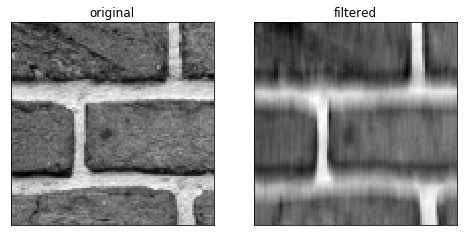

In [5]:
ft2 = ft1.T
print(ft2.shape)
print(ft2)
res2 = show_conv(img, ft2)

#### blurring in both directions

(10, 10)


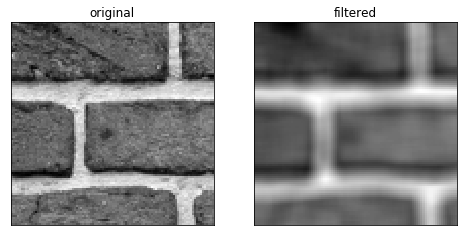

In [6]:
ft5 = 0.01*np.ones((10,10))
print(ft5.shape)
res5 = show_conv(img, ft5)

#### Horizontal derivatives

(1, 3)
[[-1  0  1]]


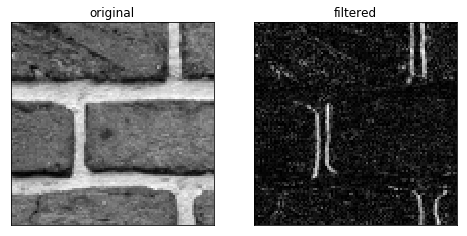

In [7]:
ft3 = np.array([-1, 0, 1])[None]
print(ft3.shape)
print(ft3)
res3 = show_conv(img, ft3)

#### Vertical derivatives

(3, 1)
[[-1]
 [ 0]
 [ 1]]


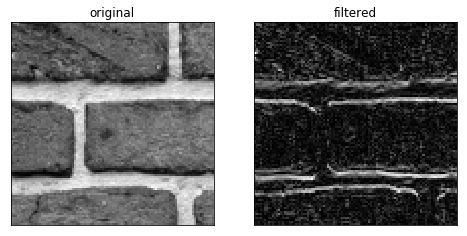

In [8]:
ft4 = ft3.T
print(ft4.shape)
print(ft4)
res4 = show_conv(img, ft4)

#### Sum of vertical and horizontal derivatives

(3, 3)
[[-2 -1  0]
 [-1  0  1]
 [ 0  1  2]]


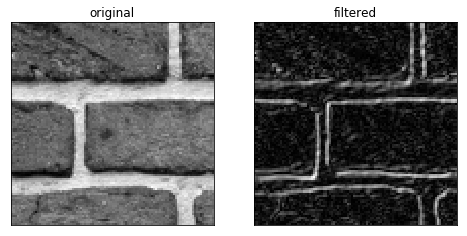

In [9]:
ft6 = ft3+ft4
print(ft6.shape)
print(ft6)
res6 = show_conv(img, ft6)

#### Increased intensity

(1, 1)
[[2.]]


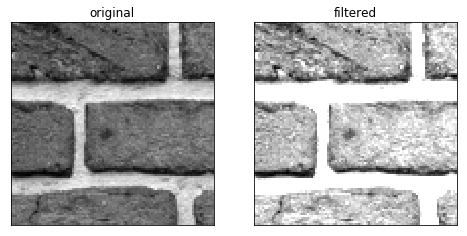

In [10]:
ft7 = np.ones((1,1))*2
print(ft7.shape)
print(ft7)
res6 = show_conv(img, ft7)

## Examples of convnets in action

Requires Keras to be installed (Lecture 32).

In [11]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

//anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load a **pre-trained** 50-layer "residual network" trained on the ImageNet dataset.

In [12]:
model = ResNet50(weights='imagenet')

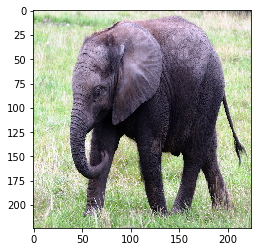

In [13]:
def prep_show_img(img_path):
    img = image.load_img(os.path.join("img", img_path), target_size=(224, 224))
    plt.imshow(img);
    return img
img = prep_show_img('elephant.jpg')

In [14]:
def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    return decode_predictions(preds, top=3)

predict(model, img)

[[('n02504458', 'African_elephant', 0.7565041),
  ('n01871265', 'tusker', 0.15485942),
  ('n02504013', 'Indian_elephant', 0.08815667)]]

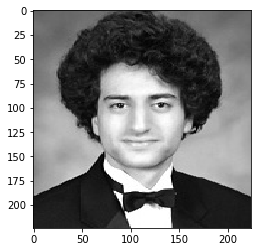

In [15]:
img = prep_show_img('gelbart-michael-adam.jpg')

In [16]:
predict(model, img)

[[('n02883205', 'bow_tie', 0.9977101),
  ('n03838899', 'oboe', 0.00049645593),
  ('n02669723', 'academic_gown', 0.00023242227)]]

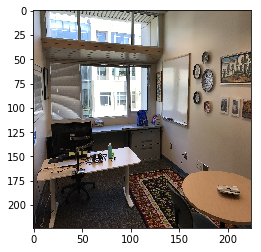

In [17]:
img = prep_show_img('office.jpg')

In [18]:
predict(model, img)

[[('n04005630', 'prison', 0.27079085),
  ('n04239074', 'sliding_door', 0.10537675),
  ('n04081281', 'restaurant', 0.048255067)]]

## Model architecture and number of parameters

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [2]:
# define a simple CNN model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Can we account for all these parameters?

- The 1st convolutional layer has $5\times 5\times 3\times 32$ (+32 bias).
  - this results in images of size 24x24 (we're throwing away the boundaries) 
  - after 2x2 max pooling they are 12x12. 
- The 2nd convolutional layer has $5\times 5\times 32\times 32$ (+32 bias). 
  - this results in images of size 8x8 
  - after 2x2 max pooling they are 4x4. 
  - after flattening we have $4\times 4 \times 32 = 512$ units
- The fully connected layer has $512 \times 10$ (+10 bias).

Total numer of parameters: 

In [3]:
(5*5*3*32 + 32) + (5*5*32*32 + 32) + (512*10 + 10)

33194

We can confirm below:

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

If you understand the above calculation, you understand CNNs to a level _beyond_ what you need for CPSC 340. 

We'll actually train such a model next class. It's too slow on my laptop!

## Convolutions as matrix multiplication

Create an example signal

In [21]:
x = np.random.randint(0, 10, size=10)
x

array([4, 3, 1, 6, 0, 3, 6, 7, 7, 1])

Convolve it with an averaging filter of width 5....

In [26]:
w = np.ones(5)/5
np.convolve(x,w,mode='valid')

array([2.8, 2.6, 3.2, 4.4, 4.6, 4.8])

Create the matrix version

In [27]:
import scipy.linalg
W = scipy.linalg.toeplitz([1/5,0,0,0,0,0],[1/5,1/5,1/5,1/5,1/5,0,0,0,0,0])
W

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2]])

See that the result is the same as the convolution

In [28]:
W@x

array([2.8, 2.6, 3.2, 4.4, 4.6, 4.8])

If you care about boundary conditions, here's another one that returns an output that's the same size as the input:

In [29]:
np.convolve(x,w,mode='same')

array([1.6, 2.8, 2.8, 2.6, 3.2, 4.4, 4.6, 4.8, 4.2, 3. ])

In [36]:
Wsame = np.vstack(([0.2,0.2,0.2,0,0,0,0,0,0,0],[0.2,0.2,0.2,0.2,0,0,0,0,0,0],W,[0,0,0,0,0,0,0.2,0.2,0.2,0.2],[0,0,0,0,0,0,0,0.2,0.2,0.2]))
Wsame

array([[0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2]])

In [35]:
Wsame@x

array([1.6, 2.8, 2.8, 2.6, 3.2, 4.4, 4.6, 4.8, 4.2, 3. ])